### 냉각기가 센서의 온도에 영향을 얼마나 미치는지 보는 것이 목적이므로
- 냉각기의 가동 시작 시간을 기준으로 key 값 설정

### Import & Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os

_dir = '_19'
_file_ls = os.listdir(_dir)
_file_ls

freez2 = pd.read_csv(os.path.join(_dir, _file_ls[3]))
suth2 = pd.read_csv(os.path.join(_dir, _file_ls[5]))

freez2.columns
freez2.columns = ['freezer_id', 'gw_time', 'status', 'fan_run', 'fan_trip',
       'freez_run', 'freez_trip', 'defrost', 'ctrl_mode', 'ctrl_operation',
       'operation', 'run_time', 'insert_dt']

suth2.columns
suth2.columns = ['sensor_id', 'gw_time', 'status', 'color_list', 'avg_temperature',
       'avg_humidity', 'temperature', 'humidity', 'battery', 'available',
       'insert_dt']


In [2]:
# No. 16
sensor_id = [290, 293, 296, 299]
freezer_id = [308,314,320,326]

df_sensor = pd.DataFrame()
df_freezer = pd.DataFrame()

for elem in sensor_id:
    df_sensor = pd.concat([df_sensor, suth2[suth2['sensor_id'] == elem]])
    print("sensor id {}의 데이터 개수: {}".format(elem, len(suth2[suth2['sensor_id'] == elem])))
for elem in freezer_id:
    df_freezer = pd.concat([df_freezer, freez2[freez2['freezer_id'] == elem]])
    print("freezer id {}의 데이터 개수: {}".format(elem, len(df_freezer[df_freezer['freezer_id'] == elem])))


print(df_sensor['sensor_id'].unique())
print(df_freezer['freezer_id'].unique())

sensor id 290의 데이터 개수: 80181
sensor id 293의 데이터 개수: 80181
sensor id 296의 데이터 개수: 80174
sensor id 299의 데이터 개수: 80174
freezer id 308의 데이터 개수: 81099
freezer id 314의 데이터 개수: 81099
freezer id 320의 데이터 개수: 81099
freezer id 326의 데이터 개수: 81099
[290 293 296 299]
[308 314 320 326]


### type 변환 및 sorting

In [3]:
df_freezer = df_freezer.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)
df_sensor = df_sensor.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)

df_freezer['gw_time'] = pd.to_datetime(df_freezer['gw_time'])
df_sensor['gw_time'] = pd.to_datetime(df_sensor['gw_time'])


### key 생성

In [4]:
df_freezer['key'] = [x for x in range(len(df_freezer))]
df_sensor['key'] = [None]*len(df_sensor)

### Mapping

In [5]:
from tqdm import tqdm
for i in tqdm(range(len(df_freezer)-1, -1, -1)):
    df_sensor.loc[(df_sensor['gw_time'] - df_freezer.loc[i,'gw_time'] <= dt.timedelta(seconds = 30))&(df_sensor['gw_time'] - df_freezer.loc[i,'gw_time'] > dt.timedelta(seconds = 0)), 'key'] = df_freezer.loc[i,'key']

100%|██████████| 324396/324396 [50:04<00:00, 107.99it/s]


In [7]:
df_freezer

,freezer_id,gw_time,status,fan_run,fan_trip,freez_run,freez_trip,defrost,ctrl_mode,ctrl_operation,operation,run_time,insert_dt,key
0,308,2019-02-01 00:00:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,2019-02-01 00:00:19,0
1,320,2019-02-01 00:00:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,2019-02-01 00:00:19,1
2,314,2019-02-01 00:00:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,2019-02-01 00:00:19,2
3,326,2019-02-01 00:00:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,2019-02-01 00:00:19,3
4,308,2019-02-01 00:00:49,1,1.0,0.0,0.0,0.0,0.0,0,1,1,0,2019-02-01 00:00:50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324391,308,2019-02-28 23:59:05,1,1.0,0.0,0.0,0.0,0.0,1,0,0,509,2019-02-28 23:59:05,324391
324392,314,2019-02-28 23:59:36,1,1.0,0.0,0.0,0.0,0.0,1,0,0,0,2019-02-28 23:59:36,324392
324393,308,2019-02-28 23:59:36,1,1.0,0.0,0.0,0.0,0.0,1,0,0,509,2019-02-28 23:59:36,324393
324394,320,2019-02-28 23:59:36,1,1.0,0.0,0.0,0.0,0.0,1,0,0,195,2019-02-28 23:59:36,324394


In [6]:
df_sensor

,sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
0,290,2019-02-01 00:00:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-2.08,23.91,100,1,2019-02-01 00:00:22,0
1,293,2019-02-01 00:00:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-0.65,21.41,100,1,2019-02-01 00:00:22,0
2,299,2019-02-01 00:00:22,3,"{""total_status"": ""grey""}",0.06,21.06,-99999.00,-99999.00,-99999,0,2019-02-01 00:00:22,0
3,296,2019-02-01 00:00:22,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.06,21.06,2.90,17.86,100,1,2019-02-01 00:00:22,0
4,299,2019-02-01 00:00:52,3,"{""total_status"": ""grey""}",0.07,21.12,-99999.00,-99999.00,-99999,0,2019-02-01 00:00:53,4
...,...,...,...,...,...,...,...,...,...,...,...,...
320705,290,2019-02-28 23:59:03,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.33,39.68,-8.66,50.71,100,1,2019-02-28 23:59:03,324384
320706,290,2019-02-28 23:59:33,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-8.65,50.84,100,1,2019-02-28 23:59:34,324388
320707,296,2019-02-28 23:59:33,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-1.89,33.42,100,1,2019-02-28 23:59:34,324388
320708,293,2019-02-28 23:59:33,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-5.96,42.72,100,1,2019-02-28 23:59:34,324388


In [10]:
df = pd.merge(df_freezer, df_sensor, how = 'outer', on = 'key').sort_values(by = 'key')
col = ['key', 'gw_time_x', 'gw_time_y'] + [i for i in df.columns if i not in ['key', 'gw_time_x', 'gw_time_y']]
df = df[col]
df

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_4024\3890029638.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.merge(df_freezer, df_sensor, how = 'outer', on = 'key').sort_values(by = 'key')


,key,gw_time_x,gw_time_y,freezer_id,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,sensor_id,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y
0,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,290.0,0.0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-2.08,23.91,100.0,1.0,2019-02-01 00:00:22
1,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,293.0,0.0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-0.65,21.41,100.0,1.0,2019-02-01 00:00:22
2,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,299.0,3.0,"{""total_status"": ""grey""}",0.06,21.06,-99999.00,-99999.00,-99999.0,0.0,2019-02-01 00:00:22
3,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,296.0,0.0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.06,21.06,2.90,17.86,100.0,1.0,2019-02-01 00:00:22
4,1.0,2019-02-01 00:00:19,NaT,320.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565626,None,NaT,2019-02-28 14:35:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,290.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-5.03,34.76,-11.09,51.26,100.0,1.0,2019-02-28 14:35:55
565627,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,296.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-5.03,34.78,-1.88,26.07,100.0,1.0,2019-02-28 14:36:25
565628,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,299.0,2.0,"{""humidity"": ""green"", ""temperature"": ""yellow"",...",-5.03,34.78,0.60,22.11,100.0,1.0,2019-02-28 14:36:25
565629,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,290.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-5.03,34.78,-11.09,51.38,100.0,1.0,2019-02-28 14:36:25


In [13]:
df.columns

Index(['key', 'gw_time_x', 'gw_time_y', 'freezer_id', 'status_x', 'fan_run',
       'fan_trip', 'freez_run', 'freez_trip', 'defrost', 'ctrl_mode',
       'ctrl_operation', 'operation', 'run_time', 'insert_dt_x', 'sensor_id',
       'status_y', 'color_list', 'avg_temperature', 'avg_humidity',
       'temperature', 'humidity', 'battery', 'available', 'insert_dt_y'],
      dtype='object')

In [14]:
df0 = df.drop(columns = ['fan_trip','freez_trip','defrost','ctrl_operation','color_list','insert_dt_x','insert_dt_y'])

In [15]:
df0

,key,gw_time_x,gw_time_y,freezer_id,status_x,fan_run,freez_run,ctrl_mode,operation,run_time,sensor_id,status_y,avg_temperature,avg_humidity,temperature,humidity,battery,available
0,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,1.0,0.0,290.0,0.0,0.06,21.06,-2.08,23.91,100.0,1.0
1,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,1.0,0.0,293.0,0.0,0.06,21.06,-0.65,21.41,100.0,1.0
2,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,1.0,0.0,299.0,3.0,0.06,21.06,-99999.00,-99999.00,-99999.0,0.0
3,0.0,2019-02-01 00:00:19,2019-02-01 00:00:22,308.0,1.0,1.0,0.0,0.0,1.0,0.0,296.0,0.0,0.06,21.06,2.90,17.86,100.0,1.0
4,1.0,2019-02-01 00:00:19,NaT,320.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565626,None,NaT,2019-02-28 14:35:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,1.0,-5.03,34.76,-11.09,51.26,100.0,1.0
565627,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.0,1.0,-5.03,34.78,-1.88,26.07,100.0,1.0
565628,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.0,2.0,-5.03,34.78,0.60,22.11,100.0,1.0
565629,None,NaT,2019-02-28 14:36:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,1.0,-5.03,34.78,-11.09,51.38,100.0,1.0


In [ ]:
# from tqdm import tqdm

# # 데이터 보존하는 버전
# def mapping1(freezer, sensor):
#     new_sensor = pd.DataFrame()
#     # 키 생성
#     freezer['key'] = [x for x in range(len(freezer))]
#     sensor['key'] = [None]*len(sensor)

#     # type 변환
#     freezer = freezer.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)
#     sensor = sensor.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)

#     # sorting
#     freezer['gw_time'] = pd.to_datetime(freezer['gw_time'])
#     sensor['gw_time'] = pd.to_datetime(sensor['gw_time'])

#     # mapping
#     for i in tqdm(range(len(freezer))):
#         tmp = sensor.loc[(sensor['gw_time'] - freezer['gw_time'] > dt.timedelta(seconds=0))&((sensor['gw_time'] - freezer['gw_time'] <= dt.timedelta(seconds=0)))]
#         tmp['key'] = [freezer['key']] * len(tmp)
#         new_sensor = pd.concat([new_sensor, tmp])
    
#     return new_sensor


In [ ]:
# def time_mapping(sensor, freezer):
#     for i in tqdm(range(len(freezer)-1 ,-1, -1)):
#         sensor.loc[
#             (sensor["gw_time"] - freezer.iloc[i]["gw_time"] <= dt.timedelta(seconds=30))
#             & (
#                 sensor["gw_time"] - freezer.iloc[i]["gw_time"] > dt.timedelta(seconds=0)
#             ),
#             "key",
#         ] = freezer.iloc[i]["key"]
#     df = pd.merge(freezer, sensor, how="outer", on="key").sort_values(by="key")
#     col = ["key", "gw_time_x", "gw_time_y"] + [
#         i for i in df.columns if i not in ["key", "gw_time_x", "gw_time_y"]
#     ]
#     df = df[col]
#     return df


# _data = []
# for _id in df_freezer["freezer_id"].unique():
#     _tmp = time_mapping(df_sensor, df_freezer[df_freezer["freezer_id"] == _id])
#     _data.append(_tmp)



In [127]:
df.head(30)

,key,gw_time_x,gw_time_y,freezer_id,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,sensor_id,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y
0,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-2.08,23.91,100,1,2019-02-01 00:00:22
1,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,293,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-0.65,21.41,100,1,2019-02-01 00:00:22
2,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,299,3,"{""total_status"": ""grey""}",0.06,21.06,-99999.00,-99999.00,-99999,0,2019-02-01 00:00:22
3,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,296,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.06,21.06,2.90,17.86,100,1,2019-02-01 00:00:22
4,4,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,299,3,"{""total_status"": ""grey""}",0.07,21.12,-99999.00,-99999.00,-99999,0,2019-02-01 00:00:53
5,4,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.07,21.12,-2.07,23.97,100,1,2019-02-01 00:00:53
6,4,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,293,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.07,21.12,-0.64,21.48,100,1,2019-02-01 00:00:53
7,4,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,296,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.07,21.12,2.91,17.90,100,1,2019-02-01 00:00:53
11,10,2019-02-01 00:01:19,2019-02-01 00:01:23,308,1,1.0,0.0,0.0,0.0,0.0,...,296,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.08,21.16,2.91,17.92,100,1,2019-02-01 00:01:23
10,10,2019-02-01 00:01:19,2019-02-01 00:01:23,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.16,-2.04,24.03,100,1,2019-02-01 00:01:23


In [7]:
df = pd.merge(df_freezer, df_sensor, how = 'outer', on = 'key').sort_values(by = 'key')
key = df['key']
gw_time_x = df['gw_time_x']
gw_time_y = df['gw_time_y']
df = df.drop(columns= ['key','gw_time_x','gw_time_y'])
df.insert(0,'key',key)
df.insert(1,'gw_time_x',gw_time_x)
df.insert(2,'gw_time_y',gw_time_y)
df.sort_values(by = 'key')
df.to_csv('mapping_february16.csv')

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_3040\2142065706.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.merge(df_freezer, df_sensor, how = 'outer', on = 'key').sort_values(by = 'key')


In [8]:
# mapping 안된 데이터 개수
df_sensor['key'].isnull().sum()

2796

In [9]:
df0 = df.copy()

In [10]:
df0.columns

Index(['key', 'gw_time_x', 'gw_time_y', 'freezer_id', 'status_x', 'fan_run',
       'fan_trip', 'freez_run', 'freez_trip', 'defrost', 'ctrl_mode',
       'ctrl_operation', 'operation', 'run_time', 'insert_dt_x', 'sensor_id',
       'status_y', 'color_list', 'avg_temperature', 'avg_humidity',
       'temperature', 'humidity', 'battery', 'available', 'insert_dt_y'],
      dtype='object')

In [11]:
df0['sensor_id'].unique()

array([ nan, 290., 293., 299., 296.])

In [12]:
freez2[['freezer_id','status']]

,freezer_id,status
0,61,1
1,61,1
2,61,1
3,61,1
4,61,1
...,...,...
2185008,491,1
2185009,491,1
2185010,491,1
2185011,491,1


In [13]:
freez2[['freezer_id','status']]

,freezer_id,status
0,61,1
1,61,1
2,61,1
3,61,1
4,61,1
...,...,...
2185008,491,1
2185009,491,1
2185010,491,1
2185011,491,1


In [14]:
freez2[freez2['freezer_id']==61]['status']

0        1
1        1
2        1
3        1
4        1
        ..
88581    1
88582    1
88583    1
88584    1
88585    1
Name: status, Length: 88586, dtype: int64

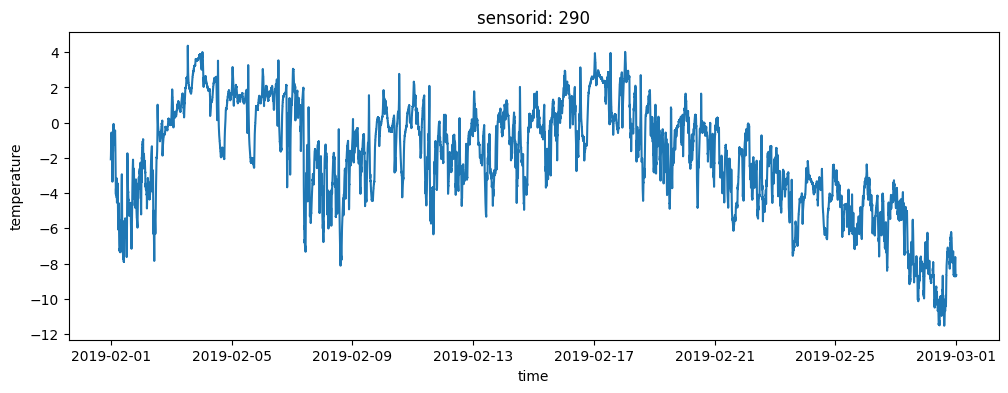

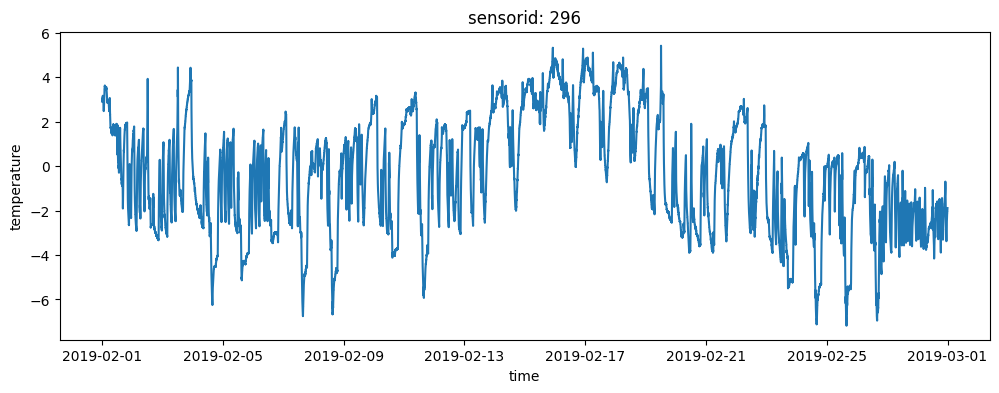

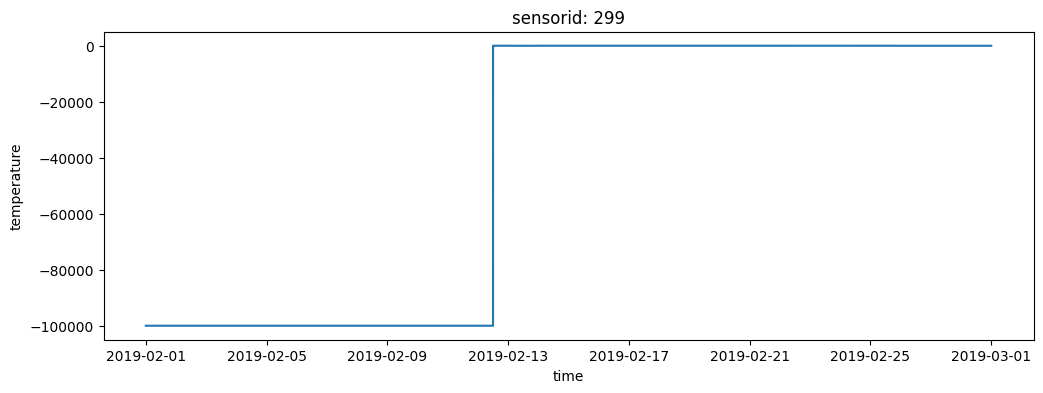

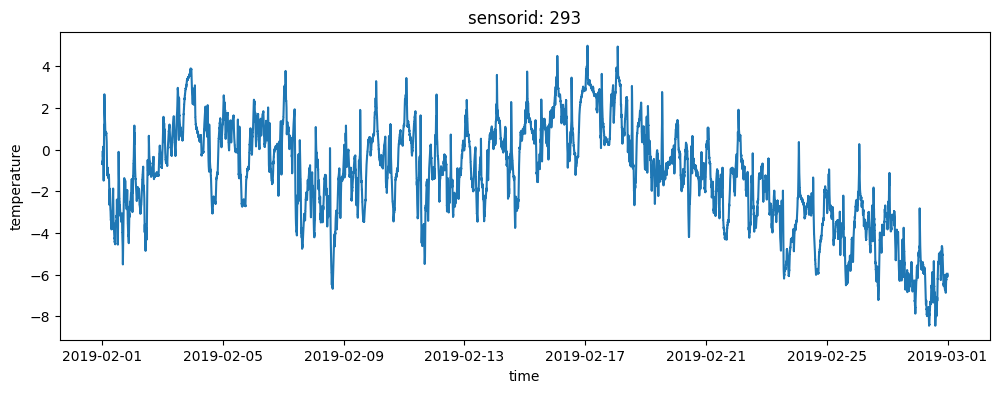

In [15]:
import seaborn as sns
for elem in [290, 296, 299, 293]:
    plt.figure(figsize=(12, 4))
    data = df0[df0['sensor_id'] == elem]
    f_data = freez2
    plt.title(f"sensorid: {elem}")
    plt.plot(data['gw_time_x'], data['temperature'])
    plt.xlabel('time')
    plt.ylabel('temperature')
    plt.show()

In [26]:
df[df['freezer_id'] == 308]

,key,gw_time_x,gw_time_y,freezer_id,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,sensor_id,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y
0,0.0,2019-02-01 00:00:19,NaT,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,2019-02-01 00:00:49,NaT,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,10.0,2019-02-01 00:01:19,NaT,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,15.0,2019-02-01 00:01:50,2019-02-01 00:01:53,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,293.0,0.0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.19,-0.64,21.55,100.0,1.0,2019-02-01 00:01:53
25,15.0,2019-02-01 00:01:50,2019-02-01 00:01:53,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,299.0,3.0,"{""total_status"": ""grey""}",0.08,21.19,-99999.00,-99999.00,-99999.0,0.0,2019-02-01 00:01:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562828,324391.0,2019-02-28 23:59:05,2019-02-28 23:59:33,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,296.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-1.89,33.42,100.0,1.0,2019-02-28 23:59:34
562829,324391.0,2019-02-28 23:59:05,2019-02-28 23:59:33,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,293.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-5.96,42.72,100.0,1.0,2019-02-28 23:59:34
562827,324391.0,2019-02-28 23:59:05,2019-02-28 23:59:33,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,290.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-8.65,50.84,100.0,1.0,2019-02-28 23:59:34
562830,324391.0,2019-02-28 23:59:05,2019-02-28 23:59:33,308.0,1.0,1.0,0.0,0.0,0.0,0.0,...,299.0,1.0,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.32,39.70,-0.78,31.81,100.0,1.0,2019-02-28 23:59:34


In [30]:
df_sensor['key'].u

0              3
1              3
2              3
3              3
4              7
           ...  
320705    324387
320706    324391
320707    324391
320708    324391
320709    324391
Name: key, Length: 320710, dtype: object